This document is a Python exploration of this R-based document: http://m-clark.github.io/data-processing-and-visualization/ggplot.html.  Code is *not* optimized for anything but learning.  In addition, all the content is located with the main document, not here, so many sections may not be included.  I only focus on reproducing the code chunks and providing some useful context.

## Preliminaries

In [1]:
import pandas as pd
from plotnine import *
from plotnine.data import mtcars
%matplotlib inline

In [2]:
# misc
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# ggplot2

Visualization is key to telling the data's story, and it can take a lot of work to get things to look just right.  But, it can also be a lot of fun, so let's dive in!

When it comes to visualization, the most [popular](https://r-pkg.org/downloaded) package used in R is ggplot2.  It's so popular, it or its aesthetic is even copied in other languages/programs as well.  It entails a <span class="emph">grammar of graphics</span> (hence the **gg**), and learning that grammar is key to using it effectively. Some of the strengths of <span class="pack">ggplot2</span> include:

- The ease of getting a good looking plot
- Easy customization
- A lot of necessary data processing is done for you
- Clear syntax
- Easy multidimensional approach
- Decent default color scheme as a default
- *Lots* of extensions

Every graph is built from the same few parts, and it's important to be aware of a few key ideas, which we will cover in turn.

- Layers (and geoms)
- Piping
- Aesthetics
- Facets
- Scales
- Themes
- Extensions


ggplot2 is the primarily the vision of one person, so it is consistent even if not perfect, and follows a particular philosophy toward building visualizations.  Unfortunately, there is no ggplot2 in Python, and visualization tools in Python generally are not as straightforward in my experience.  However, we'll attempt to recreate what we can with `plotnine` and other approaches.

## Data

In [3]:
import statsmodels.api as sm

mtcars = sm.datasets.get_rdataset("mtcars", "datasets").data
mcycle = sm.datasets.get_rdataset('mcycle', 'MASS').data
diamonds = sm.datasets.get_rdataset("diamonds", "ggplot2").data
economics = sm.datasets.get_rdataset("economics", "ggplot2").data
mpg = sm.datasets.get_rdataset("mpg", "ggplot2").data


# or
mtcars = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/mtcars.csv')
mcycle = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/MASS/mcycle.csv')
diamonds = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/ggplot2/diamonds.csv')
economics = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/ggplot2/economics.csv')
mpg = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/ggplot2/mpg.csv')



starwars = pd.read_csv('../data/starwars.csv') 

/Users/micl/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


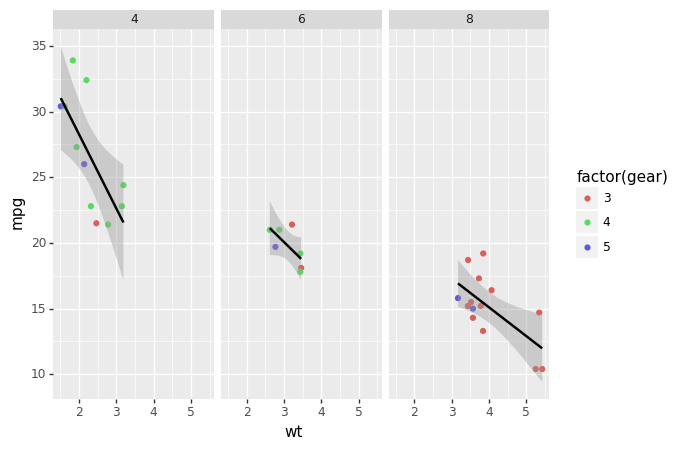

<ggplot: (8762986361141)>

In [4]:
# basics

(
ggplot(mtcars, aes(x = 'wt', y = 'mpg')) + 
    geom_point(aes(color = 'factor(gear)')) + 
    stat_smooth(method = 'lm') + 
    facet_wrap('~ cyl')
)

## Layers

In general, we start with a base layer and add to it. In most cases you’ll start as follows.

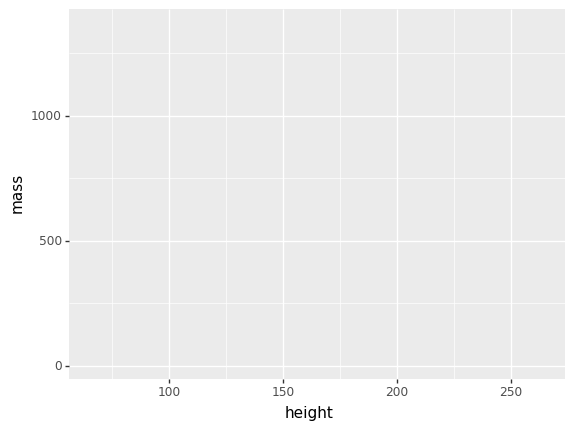

<ggplot: (8762963578845)>

In [5]:
(
ggplot(aes(x = 'height', y = 'mass'), data = starwars)
)

The code above would just produce a plot background, but nothing else. However, with the foundation in place, we’re now ready to add something to it. Let’s add some points (the outlier is Jabba the Hut).

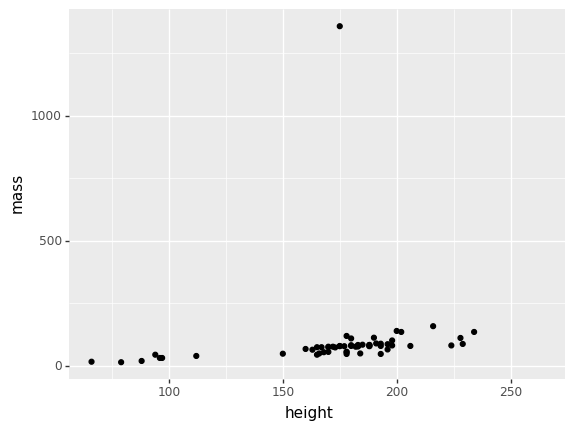

<ggplot: (8762963929733)>

In [6]:
(
ggplot(aes(x = 'height', y = 'mass'), data = starwars) + 
    geom_point()
)

Perhaps we want to change labels or theme. These would be additional layers to the plot.

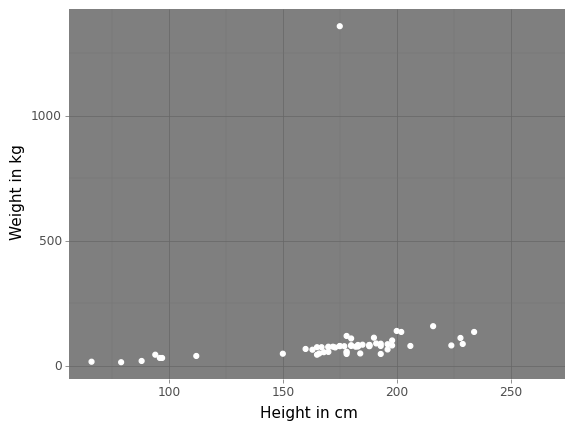

<ggplot: (8762963906137)>

In [7]:
(
ggplot(aes(x = 'height', y = 'mass'), data = starwars) + 
    geom_point(color = 'white') + 
    labs(x = 'Height in cm', y = 'Weight in kg') + 
    theme_dark()
)

Each layer is consecutively added by means of a pipe operator, and layers may regard geoms, scales, labels, facets etc. You may have many different layers to produce one plot, and there really is no limit. However some efficiencies may be possible for a given situation. For example, it’s more straightforward to use `geom_smooth` than calculate fits, standard errors etc. and then add multiple geoms to produce the same thing.

## Aesthetics

**Aesthetics** map data to various visual aspects of the plot, including size, color etc. The function used in ggplot to do this is *aes*.

```
aes(
  x = myvar,
  y = myvar2,
  color = myvar3,
  group = g
)
```

The best way to understand what goes into the `aes` function is if the value is varying.  For example, if I want the size of points to be a certain value, I would code the following.

```
... +
  geom_point(..., size = 4)
```

However, if I want the size to be associated with the data in some way, I use it as an aesthetic.

```
... +
  geom_point(aes(size = myvar))
```

The same goes for practically any aspect of a geom- size, color, fill, etc. If it is a fixed value, set it outside the aesthetic. If it varies based on the data, put it within an aesthetic.

## Geoms

In the ggplot2 world, **geoms** are the geometric objects- shapes, lines, and other parts of the visualization we want to display.  Even if you use ggplot2 a lot, you probably didn't know about many or most of these.  

## Examples

Let’s get more of a feel for things by seeing some examples that demonstrate some geoms and aesthetics.

To begin, after setting the base aesthetic, we’ll set some explicit values for the geom.

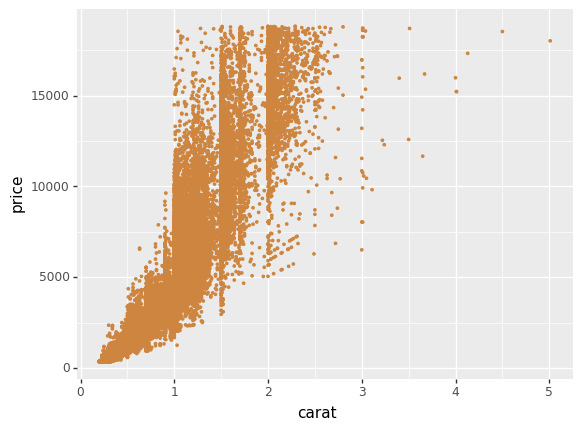

<ggplot: (8762964549077)>

In [8]:
(
ggplot(aes(x = 'carat', y = 'price'), data = diamonds) + 
    geom_point(size = .5, color = 'peru')
)

Next we use two different geoms, and one is even using a different data source.  Note that geoms  have arguments both common and specific to them. In the following, `label` is used for `geom_text`, but it would be ignored by `geom_point`.

/Users/micl/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


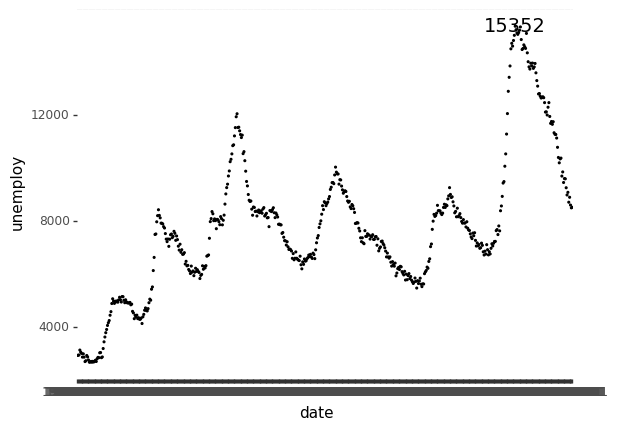

<ggplot: (8762964547825)>

In [9]:
# had issues with path/line and a date variable
(
ggplot(aes(x = 'date', y = 'unemploy'), data = economics) +
    geom_point(size = .25) + 
    geom_text(
        aes(label = 'unemploy'),
        size = 14,
        data = economics[(economics["date"] == '2009-10-01')]
  )
)

In the following, one setting, alpha (transparency), is not mapped to the data, while size and color are.

/Users/micl/anaconda3/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


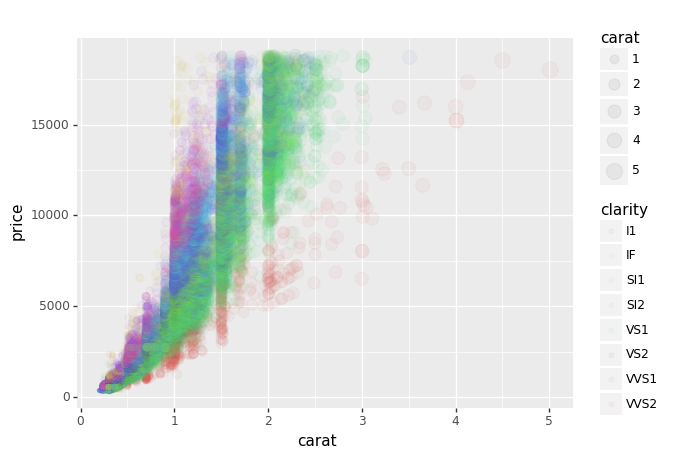

<ggplot: (8762965244757)>

In [10]:
(
ggplot(aes(x = 'carat', y = 'price'), data = diamonds) + 
    geom_point(aes(size = 'carat', color = 'clarity'), alpha = .05) 
)

## Stats

There are many statistical functions built in, and it is a key strength of the ggplot approach that you don’t have to do a lot of processing for very common plots.

Her are some quantile regression lines:

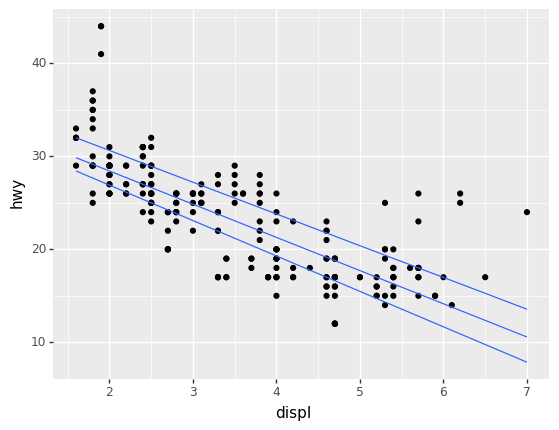

<ggplot: (8762965895809)>

In [11]:
(
ggplot(mpg, aes('displ', 'hwy')) +
    geom_point() +
    geom_quantile()
)

The following shows loess (or additive model) smooths. We can do some fine-tuning and use model-based approaches for visualization.

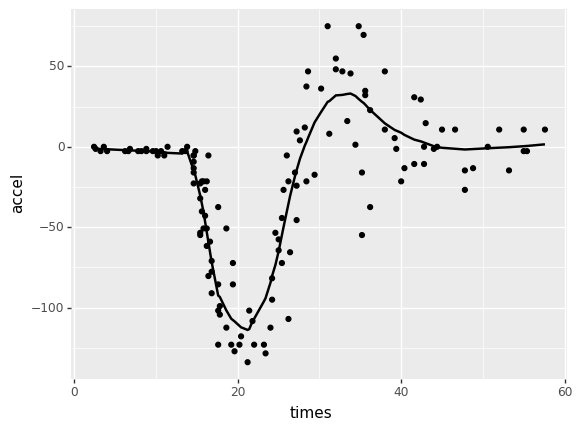

<ggplot: (8762965902117)>

In [12]:
# default lowess not so great and would need some tweaking via span
(
ggplot(aes(x = 'times', y = 'accel'), data = mcycle) +
  geom_point() +
  geom_smooth(method = 'lowess', span = .2)  # smoothing functions require other modules
)

Bootstrapped confidence intervals:

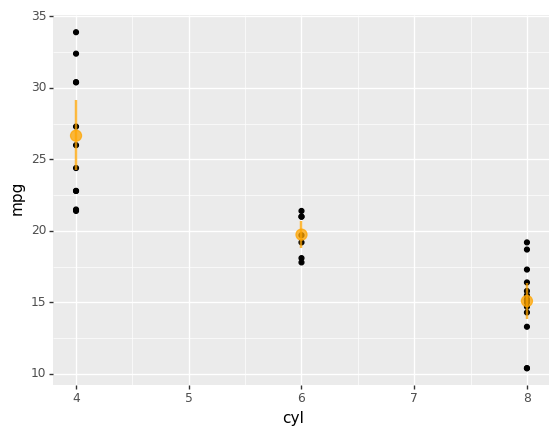

<ggplot: (8762965274861)>

In [13]:
(
ggplot(mtcars, aes('cyl', 'mpg')) + 
    geom_point() + 
    stat_summary(
        fun_data = "mean_cl_boot",
        colour = "orange",
        alpha = .75,
        size = 1
  )
)

The take-home message here is to let the plotting functionality do the work for you if at all possible. However, I will say that I find it easier to create the summary data I want to visualize, rather than use stat_summary, and you may have a similar experience.

## Scales

Often there are many things we want to change about the plot, for example, the size and values of axis labels, the range of sizes for points to take, the specific colors we want to use, and so forth.  Be aware that there are a great many options here, and you will regularly want to use them.

A very common thing you'll do is change the labels for the axes. You definitely don't have to go and change the variable name itself to do this, just use the <span class="func">labs</span> function.  There are also functions for individual parts, e.g. `xlab`, `ylab` and `ggtitle`.

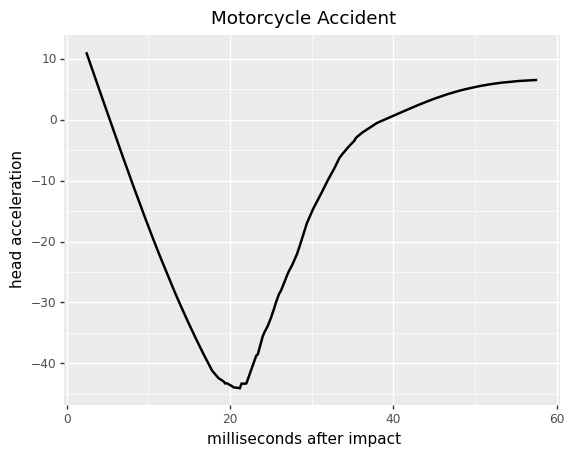

<ggplot: (8762966225633)>

In [14]:
(
ggplot(aes(x = 'times', y = 'accel'), data = mcycle) +
  geom_smooth(se = False) +
  labs(
    x     = 'milliseconds after impact', 
    y     = 'head acceleration', 
    title = 'Motorcycle Accident'
  )
)

A frequent operation is changing the x and y look in the form of limits and tick marks.  Like `labs`, there is a general `lims` function and specific functions for just the specific parts.  In addition, we may want to get really detailed using `scale_x_` or `scale_y_`.

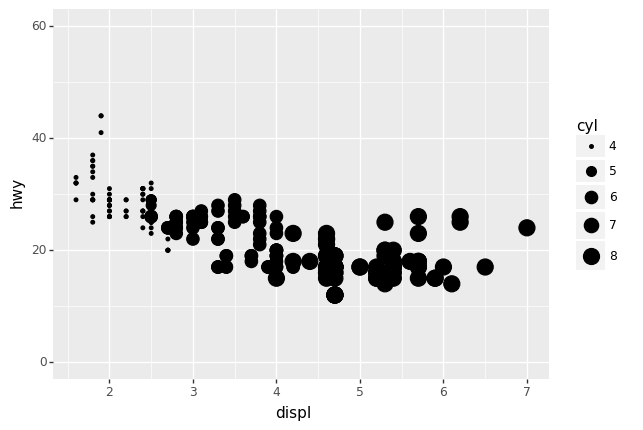

<ggplot: (8762966206093)>

In [15]:
(
ggplot(mpg, aes(x = 'displ', y = 'hwy', size = 'cyl')) + 
    geom_point() + 
    ylim(0, 60)
)

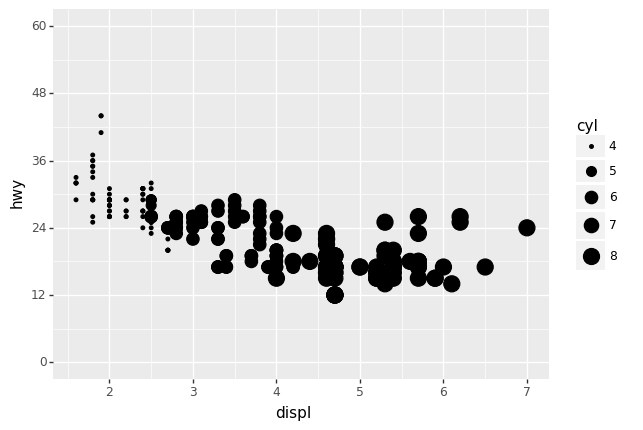

<ggplot: (8762966400901)>

In [16]:
(
ggplot(mpg, aes(x = 'displ', y = 'hwy', size = 'cyl')) + 
    geom_point() + 
    scale_y_continuous(
        limits = [0, 60],
        breaks = range(0, 61, 12),
        minor_breaks = range(6, 61, 6)
  )
)

Another common option is to change the size of points in some way.  While we assign the aesthetic as before, it comes with defaults that might not work for a given situation.  Play around with the range values.


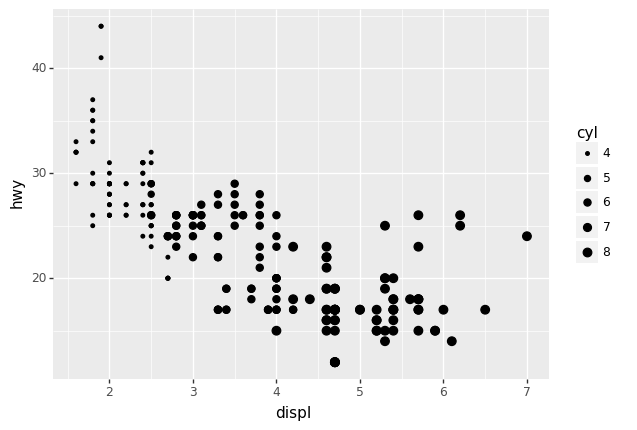

<ggplot: (8762965963929)>

In [17]:
(
ggplot(mpg, aes(x = 'displ', y = 'hwy', size = 'cyl')) +
  geom_point() +
  scale_size(range = [1, 3])
)

We will talk about color issues later, but for now, you may want to apply something besides the default options.  The following shows a built-in color scale for a color aesthetic that is treated as continuous, and one that is discrete and which we want to supply our own colors (these actually come from plotly's default color scheme).

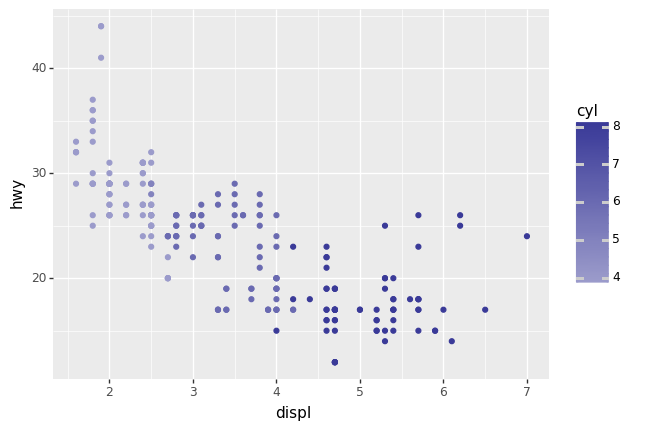

<ggplot: (8762965061257)>

In [18]:
(
ggplot(mpg, aes(x = 'displ', y = 'hwy', color = 'cyl')) +
  geom_point() +
  scale_color_gradient2()
)

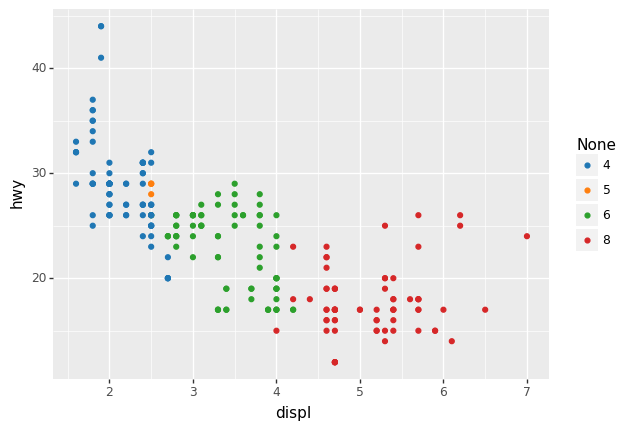

<ggplot: (8762965063001)>

In [19]:
(
ggplot(mpg, aes(x = 'displ', y = 'hwy', color = pd.Categorical(mpg['cyl']))) +
  geom_point() +
  scale_color_manual(values = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"])
)

We can even change the scale of the data itself.

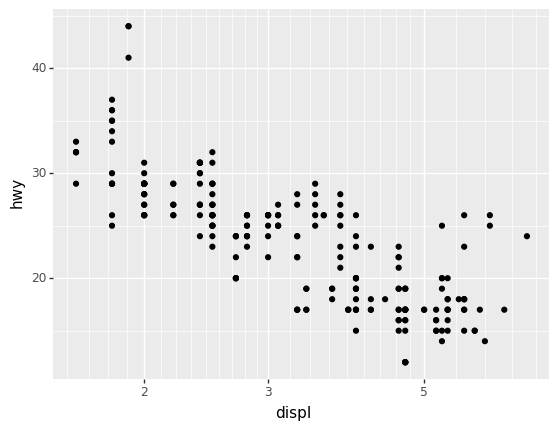

<ggplot: (8762965061269)>

In [20]:
(
ggplot(mpg, aes(x = 'displ', y = 'hwy')) +
  geom_point() +
  scale_x_log10()
)

In short, scale alterations are really useful for getting just the plot you want, and there is a lot of flexibility for you to work with.  There are a lot of scales too, so know what you have available.

## Facets

**Facets** allow for paneled display, a very common operation. In general, we often want comparison plots. The `facet_grid` function will produce a grid, and often this is all that's needed.  However, `facet_wrap` is more flexible, while possibly taking a bit extra effort to get things just the way you want. Both use a formula approach to specify the grouping.

#### facet_grid

Facet by cylinder.


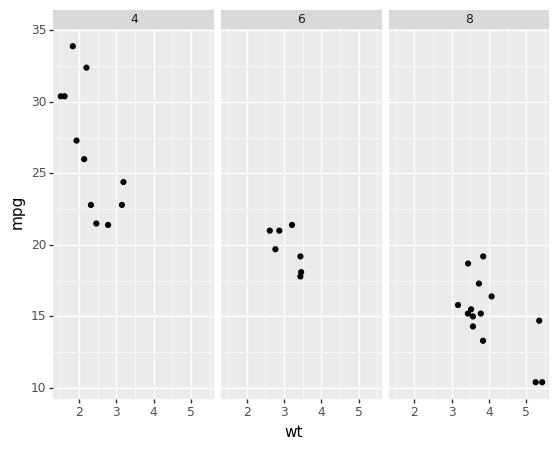

<ggplot: (8762966140429)>

In [21]:
(
ggplot(mtcars, aes(x = 'wt', y = 'mpg')) + 
  geom_point() +
  facet_grid('~ cyl')
)

Facet by vs and cylinder.

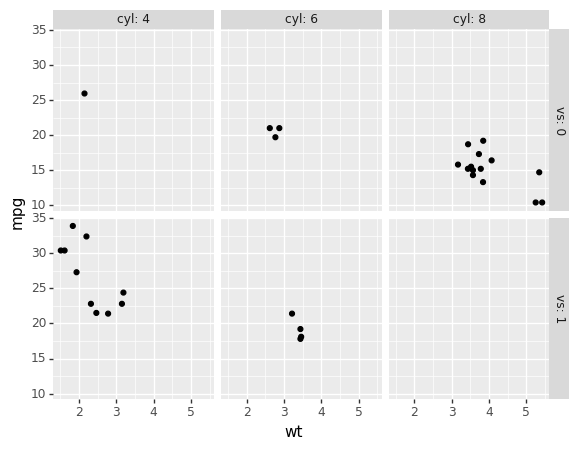

<ggplot: (8762966187553)>

In [22]:
(
ggplot(mtcars, aes(x = 'wt', y = 'mpg')) + 
  geom_point() +
  facet_grid('vs ~ cyl', labeller = label_both)
)

#### facet_wrap

Specify the number of columns or rows with `facet_wrap`.

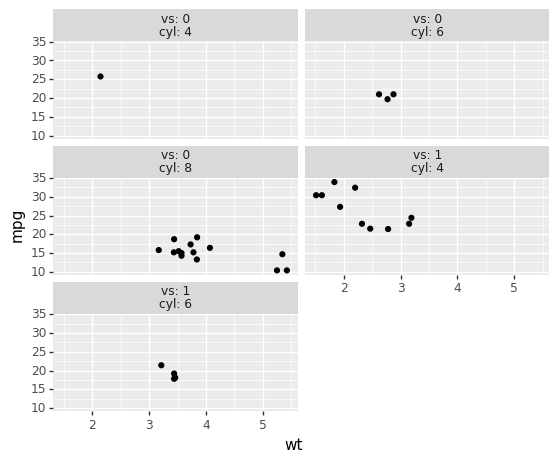

<ggplot: (8762964382141)>

In [23]:
(
ggplot(mtcars, aes(x = 'wt', y = 'mpg')) + 
  geom_point() +
  facet_wrap('~ vs + cyl', labeller = label_both, ncol=2)
)

## Fine Control

The ggplot2 approach makes it easy to get good looking graphs quickly. However the amount of fine control is extensive. The following plot is hideous, but illustrates the point.

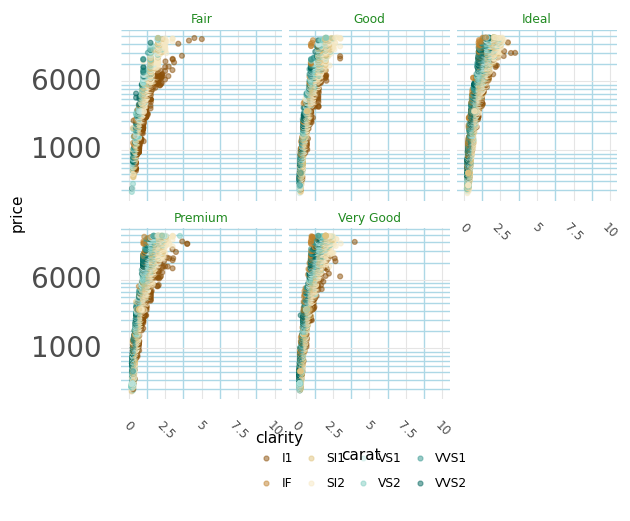

<ggplot: (8762966689333)>

In [24]:
(
ggplot(aes(x = 'carat', y = 'price'), data = diamonds) +
  geom_point(aes(color = 'clarity'), alpha = .5) + 
  scale_y_log10(breaks = range(1000, 10000, 5000)) +
  xlim(0, 10) +
  scale_color_brewer(type = 'div') +
  facet_wrap('~ cut', ncol=3) +
  theme_minimal() +
  theme(axis_ticks_major_x = element_line(color = 'darkred'),
        axis_text_x = element_text(angle = -45),
        axis_text_y = element_text(size = 20),
        strip_text = element_text(color = 'forestgreen'),
        strip_background = element_blank(),
        panel_grid_minor = element_line(color = 'lightblue'),
        legend_position = 'bottom')
)

## Themes

In the last example you saw two uses of a **theme**- a built-in version that comes with ggplot (`theme_minimal`), and specific customization (`theme`(...)).  The built-in themes provide ready-made approaches that might already be good enough for a finished product.  For the theme function, each argument, and there are many, takes on a specific value or an element function:

- `element_rect`
- `element_line`
- `element_text`
- `element_blank`

Each of those element functions has arguments specific to it. For example, for `element_text` you can specify the font size, while for element line you could specify the line type.

Note that the base theme of ggplot, and I would say every plotting package, is probably going to need manipulation before a plot is ready for presentation.  For example, the ggplot theme doesn't work well for web presentation, and is even worse for print.  You will almost invariably need to tweak it. I suggest using and saving your own custom theme for easy application for any visualization package you use frequently.

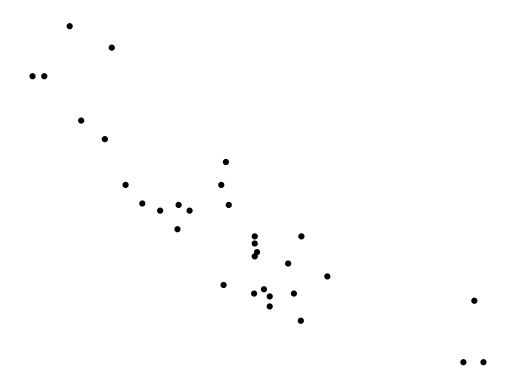

<ggplot: (8762967122741)>

In [25]:
(
ggplot(mtcars, aes(x = 'wt', y = 'mpg')) + 
    geom_point() +    
    theme_void()
)

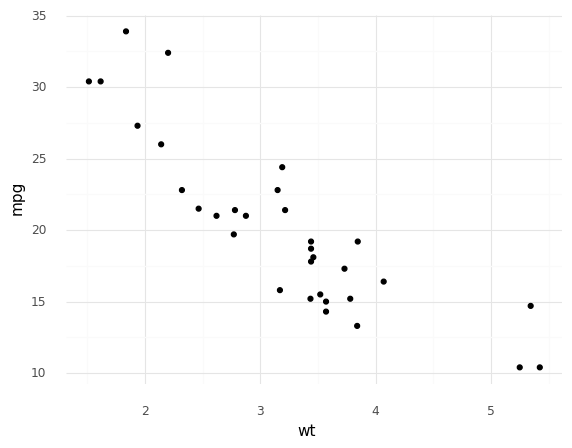

<ggplot: (8762965197881)>

In [26]:
(
ggplot(mtcars, aes(x = 'wt', y = 'mpg')) + 
    geom_point() +    
    theme_minimal()
)

## ggplot2/plotnine Summary 

**ggplot2** is an easy to use, but powerful visualization tool. It allows one to think in many dimensions for any graph, and extends well beyond the basics. With Python's plotnine, you can use it to easily create more interesting visualizations.

## plotnine Exercises

### Exercise 0

Load the `plotnine` package if you haven't already.

### Exercise 1

Create two very basic plots, one a scatterplot (e.g. with `geom_point`) and one with lines (e.g. `geom_line`) with a data set of your choosing.  Some suggestions from the data folder of this repo.

- **faithful**: Waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA.
- **diamonds**: used in the slides
- **midwest**: Midwest demographics.
- **mpg**: Fuel economy data from 1999 and 2008 for 38 popular models of car

You can use pandas to read them in via `pd.read_csv`.

Recall the basic form for a ggplot.

```
(
ggplot(data = *, aes(x = *, y = *, other)) +
  geom_*() +
  otherLayers, theme etc.
)
```

Themes to play with:

- `theme_bw`
- `theme_classic`
- `theme_dark`
- `theme_gray`
- `theme_light`
- `theme_linedraw`
- `theme_minimal`

### Exercise 2

Build on the previous plots.  Add color, change the scaling/size of points, change the axis title/labels, try a different theme and more.